## ■ Import Modules

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize
from tqdm import tqdm

import os, glob

## ■ Check File lists

In [6]:
# 주어진 경로에서 .tif 라는 파일들을 정렬하여 리스트형태로 저장함.
img_list = sorted(glob.glob('E:\\ct_lung\\CT_lung_segmentation-master\\originaldataset\\2d_images\\*.tif'))
mask_list = sorted(glob.glob('E:\\ct_lung\\CT_lung_segmentation-master\\originaldataset\\2d_masks\\*.tif'))


print(len(img_list), len(mask_list)) # 파일 갯수 확인

267 267


  4%|███▎                                                                            | 11/267 [00:00<00:02, 105.04it/s]

(267, 256, 256, 1)
(267, 256, 256, 1)


100%|███████████████████████████████████████████████████████████████████████████████| 267/267 [00:02<00:00, 118.72it/s]


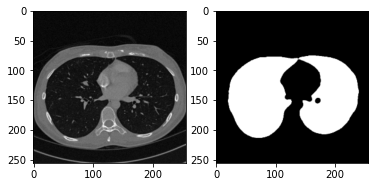

In [8]:
IMG_SIZE = 256

# 실수형의 (267,256,256,1) 형태의 초기값(무작위 값) 행렬 x_data, y_data를 만듬.

x_data, y_data = np.empty((2, len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

for i, img_path in tqdm(enumerate(img_list), total = len(img_list)):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in tqdm(enumerate(mask_list), total = len(mask_list)):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img

# preserve_range = True -> 원래의 값 범위를 유지한다.

y_data /= 255. # data normalization (데이터 정규화)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_data[12].squeeze(), cmap='gray')
ax[1].imshow(y_data[12].squeeze(), cmap='gray')

## ■ Save Dataset

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)
# train = 90%
# test = 90%

np.save('E:\ct_lung\CT_lung_segmentation-master\dataset\\x_train.npy', x_train)
np.save('E:\ct_lung\CT_lung_segmentation-master\dataset\\y_train.npy', y_train)
np.save('E:\ct_lung\CT_lung_segmentation-master\dataset\\x_val.npy', x_val)
np.save('E:\ct_lung\CT_lung_segmentation-master\dataset\\y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)
